<a href="https://colab.research.google.com/github/novalwahyu/Fall-Detection-IoT/blob/main/Machine_Learning/model/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

In [ ]:
# Mount the Google Drive
drive.mount('/content/drive')

# Specify the folder path (update with your folder's path)
folder_path = '/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/'

# Check if the folder exists
if os.path.exists(folder_path):
    # List all files and directories in the folder
    files = os.listdir(folder_path)
    print("Files in folder:")
    for file in files[:8]:
        print(file)
else:
    print(f"The folder '{folder_path}' does not exist. Please check the path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder:
UMAFall_Subject_01_ADL_Aplausing_1_2017-04-14_23-38-23.csv
UMAFall_Subject_01_ADL_Aplausing_2_2017-04-14_23-38-59.csv
UMAFall_Subject_01_ADL_Aplausing_3_2017-04-14_23-39-35.csv
UMAFall_Subject_01_ADL_HandsUp_1_2017-04-14_23-32-44.csv
UMAFall_Subject_01_ADL_HandsUp_2_2017-04-14_23-33-21.csv
UMAFall_Subject_01_ADL_HandsUp_3_2017-04-14_23-33-59.csv
UMAFall_Subject_01_ADL_MakingACall_1_2017-04-14_23-30-27.csv
UMAFall_Subject_01_ADL_MakingACall_2_2017-04-14_23-31-05.csv


In [ ]:
selected_file = files[0]
file_path = os.path.join(folder_path, selected_file)

        # Read and display the first 60 lines of the selected file
try:
 with open(file_path, 'r') as f:
  for i, line in enumerate(f):
      if i >= 55:  # Stop after 60 lines
       break
      print(line.strip())  # Print the line without extra newlines
except Exception as e:
  print(f"Error reading the file: {e}")

% Universidad de Malaga - ETSI de Telecomunicacion (Spain)
% Date: 2017-04-14_23:38:23
% ID: Subject_01_ADL_Aplausing_1
% Name: Subject_01
% Age: 67
% Height(cm): 156
% Weight(Kg): 76
% Gender: F

% Type of Movement: ADL
% Type of Movement: FALSE
% Description of the movement: Aplausing
% Trial: 1

% Number of Sensors: 5

% Used Smartphone: LGE-lge-LG-H815-5.1
% Smartphone's Accelerometer: LGE Accelerometer - Vendor: BOSCH
% --> Version: 1
% --> Min - Max Delay: 5000us - 65535000us
% --> Maximum Range: 16.000000263891405 G
% --> Resolution: 1.2136514986004396E-4 G

% SensorTag's Accelerometer: MPU-9250 MEMS MotionTracking Device - Invensense
% --> Maximum Range: 16 G
% --> Resolution: 0.00024 G

% MAC Address; Sensor_ID; Position; Device Model
%f8:95:c7:f3:ba:82; 0; RIGHTPOCKET; lge-LG-H815-5.1
%C4:BE:84:71:A5:02; 2; WAIST; SensorTag
%C4:BE:84:70:0E:80; 3; WRIST; SensorTag
%B0:B4:48:B8:77:03; 4; ANKLE; SensorTag
%C4:BE:84:70:64:8A; 1; CHEST; SensorTag

% Sensor_Type:
% Accelerometer = 

In [ ]:
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Input and output directories in Google Drive
input_dir = "/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/"
output_dir = "/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process each file in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):  # Process only CSV files
        file_path = os.path.join(input_dir, file_name)

        # Determine label based on file name
        if "_Fall_" in file_name:
            label = "FALL"
        elif "_ADL" in file_name:
            label = "NOTFALL"
        else:
            continue  # Skip files that don't match the naming pattern

        # Read and process data
        data = []
        with open(file_path, 'r') as file:
            for line in file:
                if line.startswith('%') or not line.strip():
                    continue
                parts = line.strip().split(';')
                if len(parts) == 7:
                    data.append(parts)

        # Convert to DataFrame
        columns = ["TimeStamp", "Sample No", "X-Axis", "Y-Axis", "Z-Axis", "Sensor Type", "Sensor ID"]
        df = pd.DataFrame(data, columns=columns)

        # Filter for CHEST Sensor ID (Assuming CHEST ID is 1 from metadata)
        chest_sensor_id = '1'
        df = df[df["Sensor ID"] == chest_sensor_id]

        # Split data into accelerometer and gyroscope
        acc_df = df[df["Sensor Type"] == '0'][["X-Axis", "Y-Axis", "Z-Axis"]].astype(float).reset_index(drop=True)
        gyro_df = df[df["Sensor Type"] == '1'][["X-Axis", "Y-Axis", "Z-Axis"]].astype(float).reset_index(drop=True)

        # Combine accelerometer and gyroscope data
        combined_df = pd.concat([acc_df, gyro_df], axis=1, ignore_index=True)
        combined_df.columns = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]

        # Add label column
        combined_df["label"] = label

        # Save to a new file
        output_file_path = os.path.join(output_dir, file_name.replace(".csv", "_processed.csv"))
        combined_df.to_csv(output_file_path, index=False)

        print(f"Processed and saved: {output_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/UMAFall_Subject_01_ADL_Aplausing_1_2017-04-14_23-38-23_processed.csv
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/UMAFall_Subject_01_ADL_Aplausing_2_2017-04-14_23-38-59_processed.csv
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/UMAFall_Subject_01_ADL_Aplausing_3_2017-04-14_23-39-35_processed.csv
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/UMAFall_Subject_01_ADL_HandsUp_1_2017-04-14_23-32-44_processed.csv
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/UMAFall_Subject_01_ADL_HandsUp_2_2017-04-14_23-33-21_processed.csv
Processed and saved: /content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fi

In [ ]:
output_dir = "/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/"
files = os.listdir(output_dir)
print("Files in folder:")
for file in files[:8]:
    print(file)

Files in folder:
UMAFall_Subject_01_ADL_Aplausing_1_2017-04-14_23-38-23_processed.csv
UMAFall_Subject_01_ADL_Aplausing_2_2017-04-14_23-38-59_processed.csv
UMAFall_Subject_01_ADL_Aplausing_3_2017-04-14_23-39-35_processed.csv
UMAFall_Subject_01_ADL_HandsUp_1_2017-04-14_23-32-44_processed.csv
UMAFall_Subject_01_ADL_HandsUp_2_2017-04-14_23-33-21_processed.csv
UMAFall_Subject_01_ADL_HandsUp_3_2017-04-14_23-33-59_processed.csv
UMAFall_Subject_01_ADL_MakingACall_1_2017-04-14_23-30-27_processed.csv
UMAFall_Subject_01_ADL_MakingACall_2_2017-04-14_23-31-05_processed.csv


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import glob
import numpy as np
from tensorflow import keras
from keras import Sequential
from sklearn.utils import shuffle
import sklearn.model_selection
import math
!pip install emlearn
import emlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for emlearn: filename=emlearn-0.21.0-cp310-cp310-linux_x86_64.whl size=1739987 sha256=c19d9d9be950d29530768ca9736fc650137ea2b45450354b7d8fb3eb2ab394f4
  Stored in directory: /root/.cache/pip/wheels/7d/8e/2d/799f7f5562613e2af46520458a5e232bd6b4e4777e79e13987
Successfully built emlearn


In [ ]:
fixed=[]
STEP_SIZE = 20
SENSOR_NUM = 6
NUM_CLASSESS = 2
df = pd.concat([pd.read_csv(f) for f in glob.glob('/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/*.csv')], ignore_index = True)
df.head()

<ipython-input-4-65bfd2fa16c3>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in glob.glob('/content/drive/Shared drives/Capstone Bangkit/UMAFall_Dataset/Fixed/*.csv')], ignore_index = True)


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0.672607,-0.031494,0.762695,1.273438,-6.523438,0.140625,NOTFALL
1,0.697266,-0.037109,0.804443,0.710938,-0.492188,-2.781250,NOTFALL
2,0.697266,-0.037109,0.804443,0.710938,-0.492188,-2.781250,NOTFALL
3,0.697266,-0.037109,0.804443,0.710938,-0.492188,-2.781250,NOTFALL
4,0.686035,-0.025391,0.804443,-6.289062,-0.515625,-3.000000,NOTFALL


In [ ]:
Label = {'FALL':1 , 'NOTFALL':0}
class_names = { 0:'NOTFALL', 1:'FALL'}

dataSet = df[["acc_x", "acc_y", "acc_z", "gyro_x","gyro_y","gyro_z",  "label"]]
dataSet.label = [Label[item] for item in dataSet.label]

In [ ]:
df['gyro_x'] = df['gyro_x'] * np.pi / 180
df['gyro_y'] = df['gyro_y'] * np.pi / 180
df['gyro_z'] = df['gyro_z'] * np.pi / 180
df.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0.672607,-0.031494,0.762695,0.022226,-0.113855,0.002454,NOTFALL
1,0.697266,-0.037109,0.804443,0.012408,-0.008590,-0.048542,NOTFALL
2,0.697266,-0.037109,0.804443,0.012408,-0.008590,-0.048542,NOTFALL
3,0.697266,-0.037109,0.804443,0.012408,-0.008590,-0.048542,NOTFALL
4,0.686035,-0.025391,0.804443,-0.109765,-0.008999,-0.052360,NOTFALL


In [ ]:
x = np.array(dataSet.drop(["label"],axis=1))
y = np.array(dataSet["label"])

modDataset = []
modTruth =[]

for i in range(len(x)-STEP_SIZE):
    temp = []
    for j in range(i, i+STEP_SIZE):
        temp.append(x[j])
    modDataset.append(temp)
for i in range(len(y)-STEP_SIZE):
    temp = []
    for j in range(i, i+STEP_SIZE):
        temp.append(y[j])
    most_common_item = max(temp, key = temp.count)
    modTruth.append(most_common_item)
print(len(modDataset))
print(len(modTruth))

215484
215484


In [ ]:
modDataset = np.array(modDataset).reshape(-1, STEP_SIZE, SENSOR_NUM)
y = np.array(modTruth)
x = modDataset
print(x.shape)

(215484, 20, 6)


In [ ]:
xtrain, xval, ytrain, yval = sklearn.model_selection.train_test_split(x,y,stratify=y,test_size=0.3,random_state=0)

In [ ]:
xtrain=tf.reshape(xtrain, [tf.shape(xtrain)[0], -1])
xval=tf.reshape(xval, [tf.shape(xval)[0], -1])
print(xtrain.shape)
print(xval.shape)

(150838, 120)
(64646, 120)


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.Input(shape=(120,)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.05),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history=model.fit(xtrain,ytrain, epochs=30,validation_data =(xval,yval))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,969 (46.75 KB)

 Trainable params: 11,969 (46.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8391 - loss: 0.6464 - val_accuracy: 0.9072 - val_loss: 0.2567
Epoch 2/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9073 - loss: 0.2584 - val_accuracy: 0.9145 - val_loss: 0.2337
Epoch 3/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9165 - loss: 0.2317 - val_accuracy: 0.9197 - val_loss: 0.2202
Epoch 4/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9200 - loss: 0.2189 - val_accuracy: 0.9251 - val_loss: 0.2085
Epoch 5/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9248 - loss: 0.2060 - val_accuracy: 0.9271 - val_loss: 0.2019
Epoch 6/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9281 - loss: 0.1996 - val_accuracy: 0.9299 - val_loss: 0.1969
Epoch 7/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9301 - loss: 0.1944 - val_accuracy: 0.9336 - val_loss: 0.1883
Epoch 8/30
4714/4714 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9314 - loss: 0

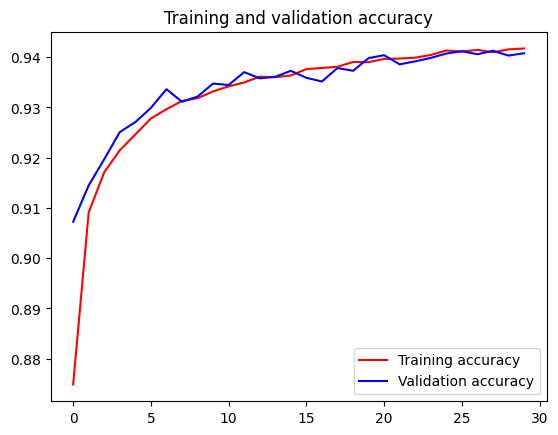

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
cmodel = emlearn.convert(model, method='inline')
cmodel.save(file='Trained2.h', name='Trained2')

'\n#include <eml_net.h>\nstatic const float Trained2_layer_0_biases[64] = { -2.382436f, -1.292562f, 0.054648f, -1.443806f, -1.721557f, -1.300297f, -3.563102f, -2.180027f, 1.219078f, -1.012418f, -1.609946f, -0.754359f, -1.673285f, -2.165131f, -0.238074f, -1.007551f, -0.234086f, -1.712139f, -1.266219f, -2.073634f, 0.678494f, -3.923573f, -0.974416f, -2.086216f, -0.936388f, -0.706194f, 0.201603f, -0.039015f, -0.445455f, 0.602180f, -1.652994f, -1.181020f, 0.080245f, -2.881802f, -1.729873f, -2.374474f, -2.422045f, -3.500551f, -0.184984f, -0.165656f, -0.860598f, -0.605984f, 0.500360f, -0.241864f, 0.106327f, -1.938234f, -1.580748f, -1.899887f, -0.853900f, -2.098877f, -0.756731f, 1.607601f, 2.701929f, -1.049093f, -0.825169f, -1.095138f, 0.248022f, -1.534599f, 0.033648f, -2.842448f, -1.771915f, -0.227486f, 0.982779f, 0.010466f };\nstatic const float Trained2_layer_0_weights[7680] = { 4.744932f, -0.718979f, -2.744916f, 0.033575f, 3.938724f, 0.402952f, -0.136124f, -0.982877f, -1.599648f, -0.762152

Accuracy, Precision, Recall, F1